In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [346]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [347]:
data = pd.read_csv("/content/new sheet dsml new.csv")

In [348]:
data.head(5)

,Fruit name,month,year,min price,max price
0,Jack Fruit,January,2021,400,1500
1,Jack Fruit,February,2021,400,1200
2,Jack Fruit,March,2021,400,1600
3,Jack Fruit,April,2021,1000,2000
4,Jack Fruit,May,2021,1000,2000


In [349]:
# Summary statistics
print(data.describe())


              year     min price      max price
count   540.000000    540.000000     540.000000
mean   2022.000000   2308.888889    7002.037037
std       0.817254   2244.811512    6631.068685
min    2021.000000    300.000000    1000.000000
25%    2021.000000   1000.000000    2500.000000
50%    2022.000000   1200.000000    5000.000000
75%    2023.000000   3000.000000   10000.000000
max    2023.000000  25000.000000  105000.000000


In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fruit name  540 non-null    object
 1   month       540 non-null    object
 2   year        540 non-null    int64 
 3   min price   540 non-null    int64 
 4   max price   540 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.2+ KB


In [351]:
data = data.dropna()

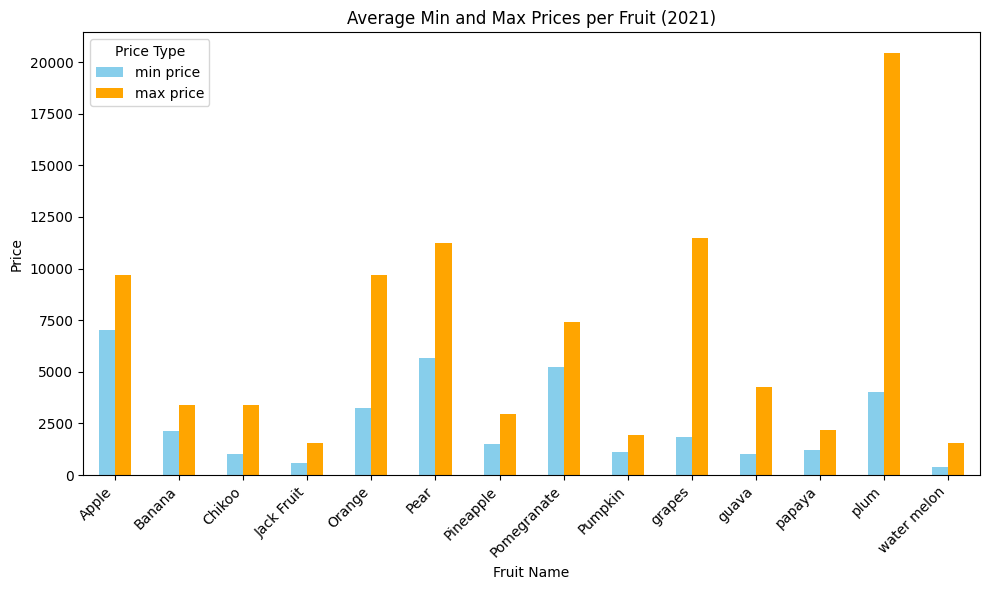

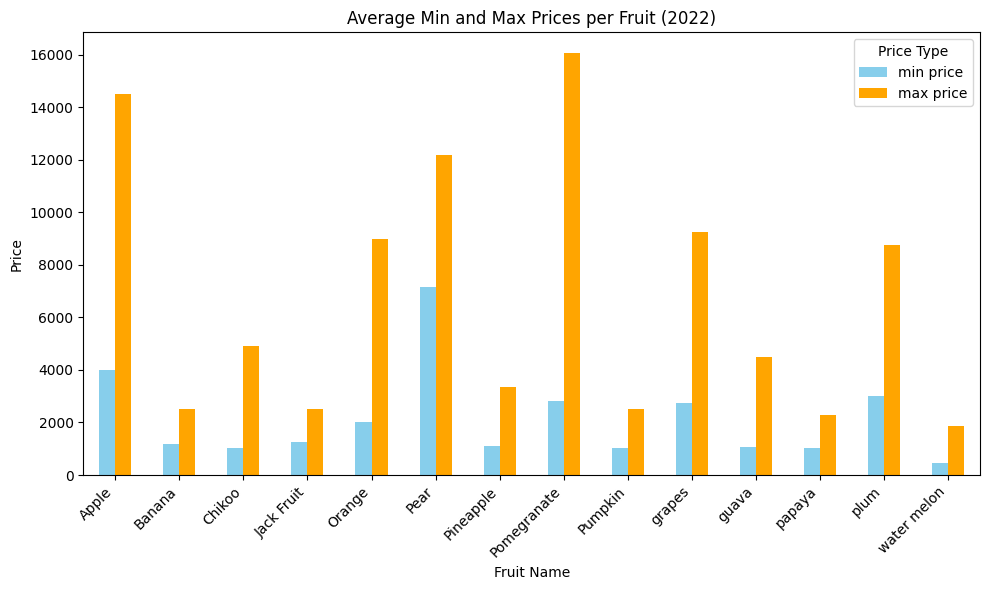

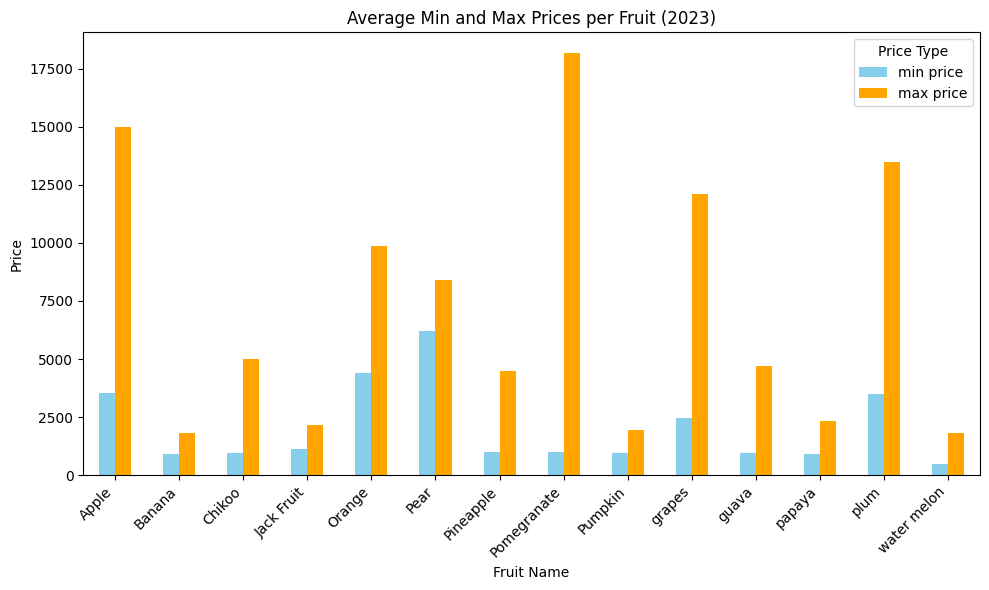

In [352]:
# Looping through each year and creating separate plots
years = data['year'].unique()  # unique years
for year in years:
    # Filtering data for the current year
    yearly_data = data[data['year'] == year]

    # Grouped data by 'Fruit name' and calculated mean prices
    avg_prices = yearly_data.groupby("Fruit name")[["min price", "max price"]].mean().reset_index()

    # Bar plot for the current year
    avg_prices.plot(x="Fruit name", kind="bar", figsize=(10, 6), stacked=False, color=['skyblue', 'orange'])
    plt.title(f"Average Min and Max Prices per Fruit ({year})")
    plt.ylabel("Price")
    plt.xlabel("Fruit Name")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Price Type")
    plt.tight_layout()
    plt.show()


In [353]:
X = data[['Fruit name','month','year']]
Y = data[['min price', 'max price']]

X1 = data[['Fruit name','month','year']]
Y_max = data[['max price']]
Y_min = data[['min price']]

In [354]:
for i in range(len(X)):
    X.loc[i, 'month'] = X.loc[i, 'month'].lower()


In [355]:
X.head()

,Fruit name,month,year
0,Jack Fruit,january,2021
1,Jack Fruit,february,2021
2,Jack Fruit,march,2021
3,Jack Fruit,april,2021
4,Jack Fruit,may,2021


In [ ]:
for col in (X.columns):
  if type(X[col][0]) == str:
    unq = X[col].unique()
    mapping = {}
    for i in range(0,len(unq)):
      mapping[unq[i]] = (i+1)

    X[col] = X[col].map(mapping)
    print(mapping)

In [357]:
X.head()

,Fruit name,month,year
0,1,1,2021
1,1,2,2021
2,1,3,2021
3,1,4,2021
4,1,5,2021


In [358]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

modelsmin = {
    "Support Vector Machine (RBF Kernel)": SVR(),
    "XGBoost": XGBRegressor(),
}

modelsmax = {
    "Support Vector Machine (RBF Kernel)": SVR(),
    "XGBoost": XGBRegressor(),
}

In [359]:
for name, model in models.items():
    model.fit(X, Y)
    print(name + " trained.")

Decision Tree trained.
Random Forest trained.


In [360]:
print(models)

{'Decision Tree': DecisionTreeRegressor(), 'Random Forest': RandomForestRegressor()}


In [ ]:
for name, model in modelsmin.items():
    model.fit(X, Y_min)

In [ ]:
for name, model in modelsmax.items():
    model.fit(X, Y_max)

R2 Score


In [363]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X, Y)))

Decision Tree R^2 Score: 0.93658
Random Forest R^2 Score: 0.88260


In [364]:
for name, model in modelsmin.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X, Y_min)))

Support Vector Machine (RBF Kernel) R^2 Score: -0.24451
XGBoost R^2 Score: 0.87968


In [365]:
for name, model in modelsmax.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X, Y_max)))

Support Vector Machine (RBF Kernel) R^2 Score: -0.09132
XGBoost R^2 Score: 0.99177


MSE

In [366]:
for name, model in models.items():
    y_pred = model.predict(X)
    mse = mean_squared_error(Y, y_pred)
    print(name + " MSE: {:.5f}".format(mse))

Decision Tree MSE: 455643.51852
Random Forest MSE: 2542588.37403


In [367]:
for name, model in modelsmin.items():
    y_pred = model.predict(X)
    mse = mean_squared_error(Y_min, y_pred)
    print(name + " MSE: {:.5f}".format(mse))

Support Vector Machine (RBF Kernel) MSE: 6259702.13552
XGBoost MSE: 605177.53734


In [368]:
for name, model in modelsmax.items():
    y_pred = model.predict(X)
    mse = mean_squared_error(Y_max, y_pred)
    print(name + " MSE: {:.5f}".format(mse))

Support Vector Machine (RBF Kernel) MSE: 47897795.93173
XGBoost MSE: 361097.88152


MAE

In [369]:
for name, model in models.items():
    y_pred = model.predict(X)
    mse = mean_absolute_error(Y, y_pred)
    print(name + " MAE: {:.5f}".format(mse))

Decision Tree MAE: 134.53704
Random Forest MAE: 400.16196


In [370]:
for name, model in modelsmin.items():
    y_pred = model.predict(X)
    mse = mean_absolute_error(Y_min, y_pred)
    print(name + " MAE: {:.5f}".format(mse))

Support Vector Machine (RBF Kernel) MAE: 1414.81848
XGBoost MAE: 151.20204


In [371]:
for name, model in modelsmax.items():
    y_pred = model.predict(X)
    mse = mean_absolute_error(Y_max, y_pred)
    print(name + " MAE: {:.5f}".format(mse))

Support Vector Machine (RBF Kernel) MAE: 4364.62961
XGBoost MAE: 285.53414


MAPE

In [372]:
for name, model in models.items():
    y_pred = model.predict(X)
    mse = np.mean(np.abs(Y - y_pred) / np.abs(Y)) * 100
    print(f"{name} MAPE: {mse}")

Decision Tree MAPE: 2.9502066463451637
Random Forest MAPE: 8.452625890067898


In [373]:
for name, model in modelsmin.items():
    y_pred = model.predict(X)
    mse = np.mean(np.abs(Y_min.squeeze() - y_pred) / np.abs(Y_min.squeeze())) * 100
    print(name + " MAPE: {:.5f}".format(mse))

Support Vector Machine (RBF Kernel) MAPE: 53.28393
XGBoost MAPE: 6.68530


In [374]:
for name, model in modelsmax.items():
    y_pred = model.predict(X)
    mse = np.mean(np.abs(Y_max.squeeze() - y_pred) / np.abs(Y_max.squeeze())) * 100
    print(name + " MAPE: {:.5f}".format(mse))

Support Vector Machine (RBF Kernel) MAPE: 83.89253
XGBoost MAPE: 5.00509


In [375]:
# Creating a new DataFrame for the year 2024 with all fruit names and months
fruits = ['Jack Fruit', 'Orange', 'Pear', 'Pumpkin', 'Apple', 'Banana', 'Chikoo', 'Pineapple', 'Pomegranate', 'guava', 'papaya', 'water melon', 'grapes', 'plum']
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
year_2024_data = pd.DataFrame([(fruit, month, 2024) for fruit in fruits for month in months], columns=['Fruit name', 'month', 'year'])

# Converting 'month' to lowercase and mapping 'Fruit name' and 'month' to numerical values as per existing code
fruit_mapping = {'Jack Fruit': 1, 'Orange': 2, 'Pear': 3, 'Pumpkin': 4, 'Apple': 5, 'Banana': 6, 'Chikoo': 7, 'Pineapple': 8, 'Pomegranate': 9, 'guava': 10, 'papaya': 11, 'water melon': 12, 'grapes': 13, 'plum': 14}
month_mapping = {'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6, 'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12}
year_2024_data['month'] = year_2024_data['month'].str.lower()
year_2024_data['Fruit name'] = year_2024_data['Fruit name'].map(fruit_mapping)
year_2024_data['month'] = year_2024_data['month'].map(month_mapping)

# Predicting min and max prices using the Decision Tree model
decision_tree_model = models["Decision Tree"]
predictions_2024 = decision_tree_model.predict(year_2024_data)
predicted_min_prices = predictions_2024[:, 0]
predicted_max_prices = predictions_2024[:, 1]

# Added predictions to the DataFrame
year_2024_data['predicted_min_price'] = predicted_min_prices
year_2024_data['predicted_max_price'] = predicted_max_prices

# Displayed the predictions
print(year_2024_data)


     Fruit name  month  year  predicted_min_price  predicted_max_price
0             1      1  2024               1000.0               2000.0
1             1      2  2024               1000.0               2000.0
2             1      3  2024               1000.0               2000.0
3             1      4  2024               1000.0               2000.0
4             1      5  2024               1000.0               2000.0
..          ...    ...   ...                  ...                  ...
163          14      8  2024               3000.0              10000.0
164          14      9  2024               3000.0              14000.0
165          14     10  2024               3000.0              14000.0
166          14     11  2024               4000.0              14000.0
167          14     12  2024               4000.0              14000.0

[168 rows x 5 columns]


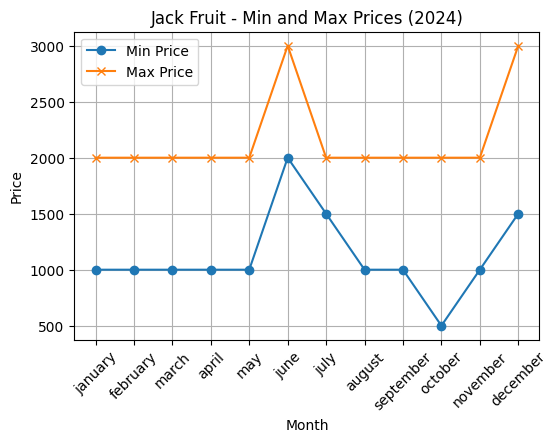

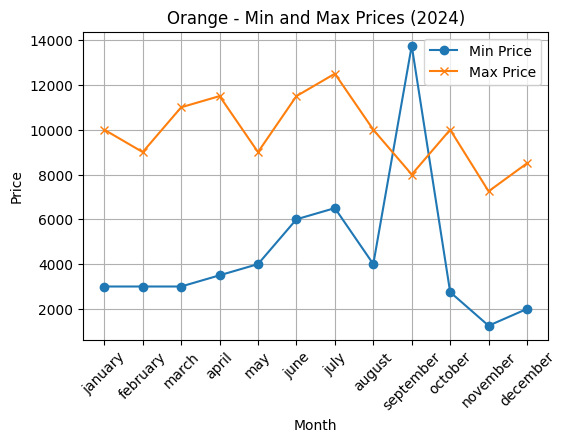

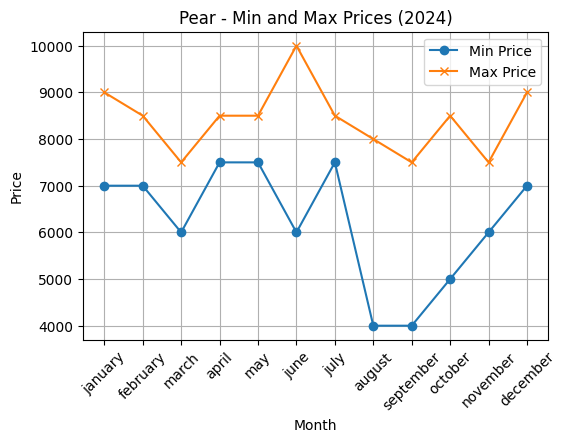

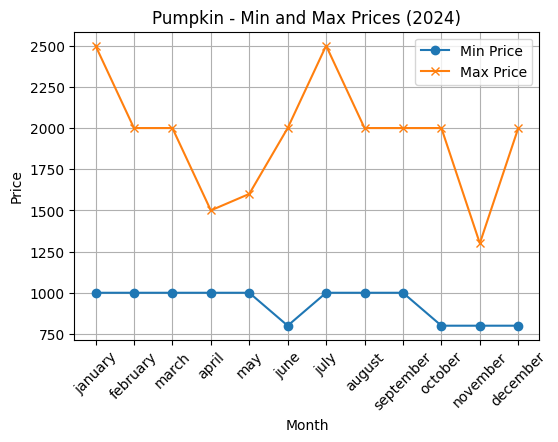

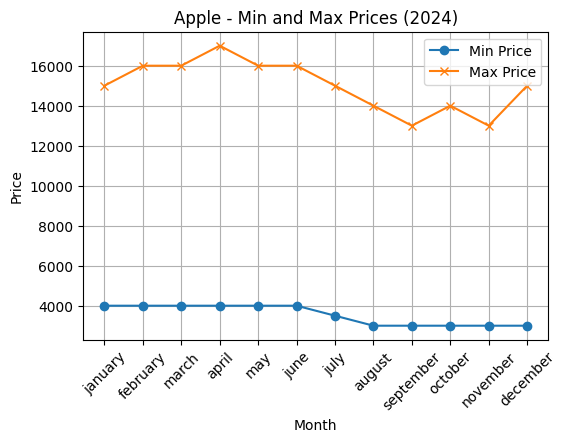

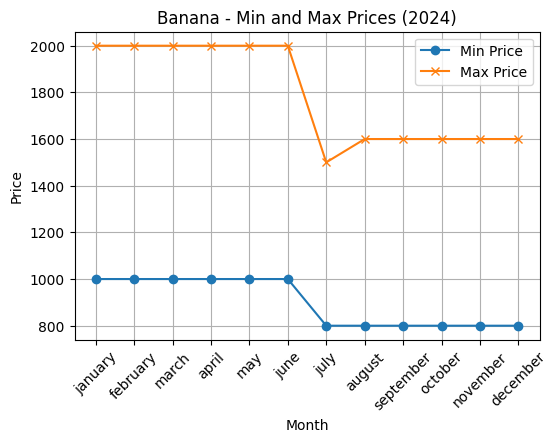

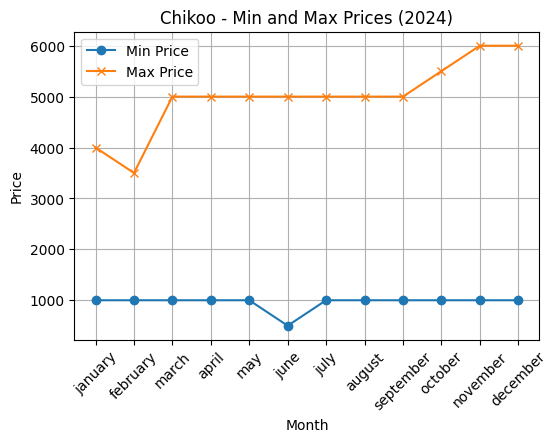

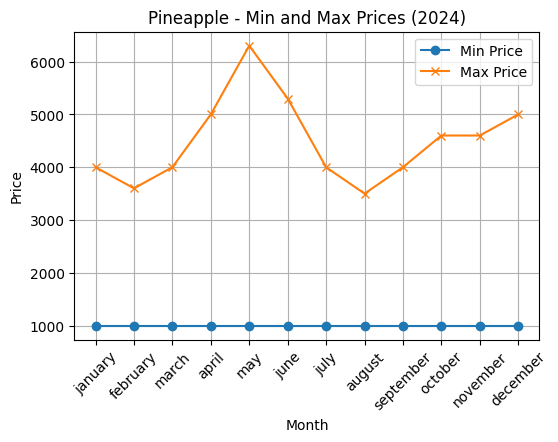

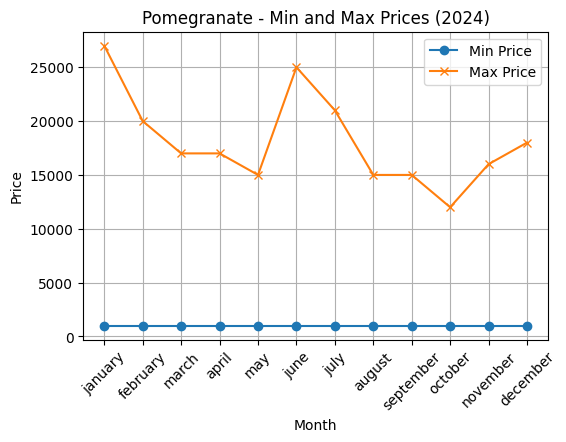

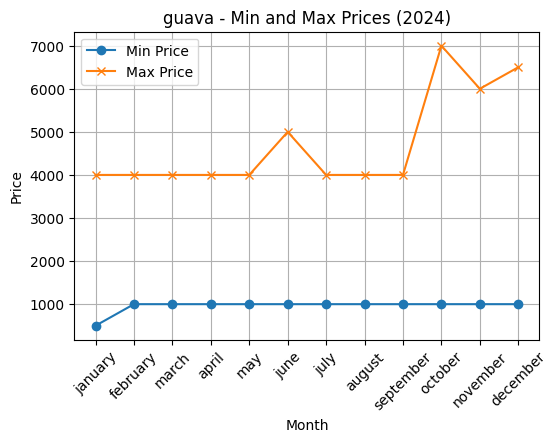

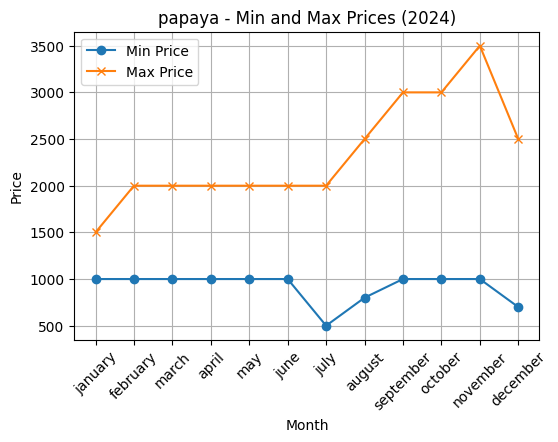

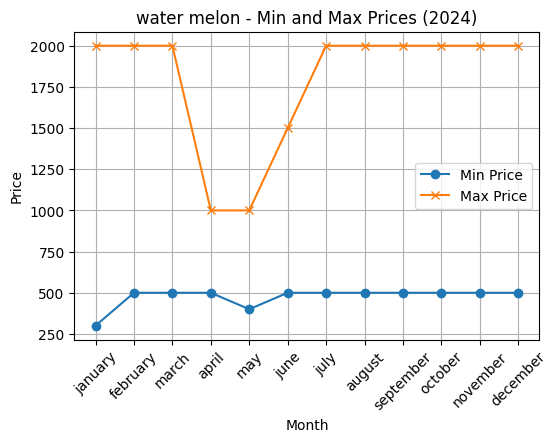

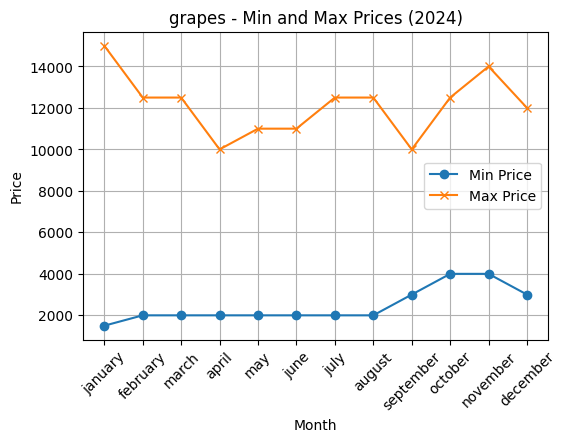

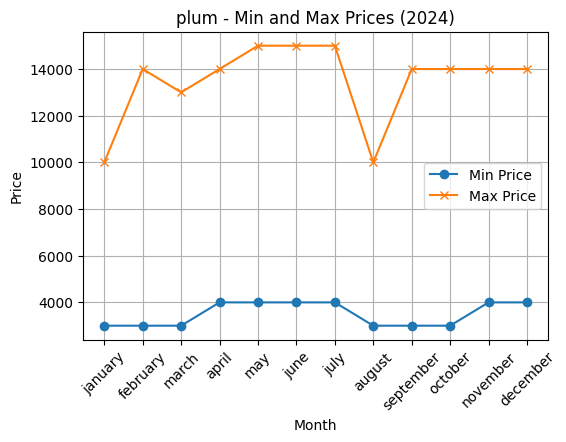

In [376]:
# Reversed the fruit mapping to get names from numbers
reverse_fruit_mapping = {v: k for k, v in fruit_mapping.items()}

# Grouped the data by fruit name
grouped_data = year_2024_data.groupby('Fruit name')

# Created a line graph for each fruit
for fruit_number, group in grouped_data:
    # Getting the fruit name using the reverse mapping
    fruit_name = reverse_fruit_mapping[fruit_number]

    plt.figure(figsize=(6,4))
    plt.plot(group['month'], group['predicted_min_price'], label='Min Price', marker='o')
    plt.plot(group['month'], group['predicted_max_price'], label='Max Price', marker='x')
    plt.title(f"{fruit_name} - Min and Max Prices (2024)")
    plt.xlabel("Month")
    plt.ylabel("Price")
    plt.xticks(range(1, 13), months, rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


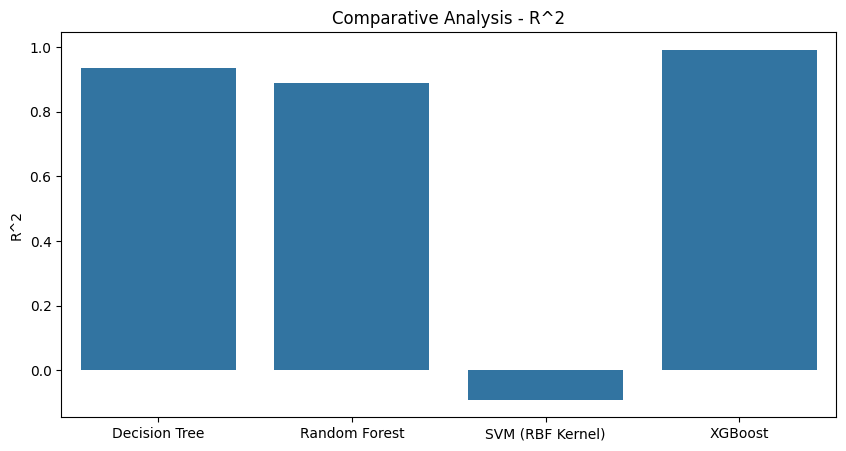

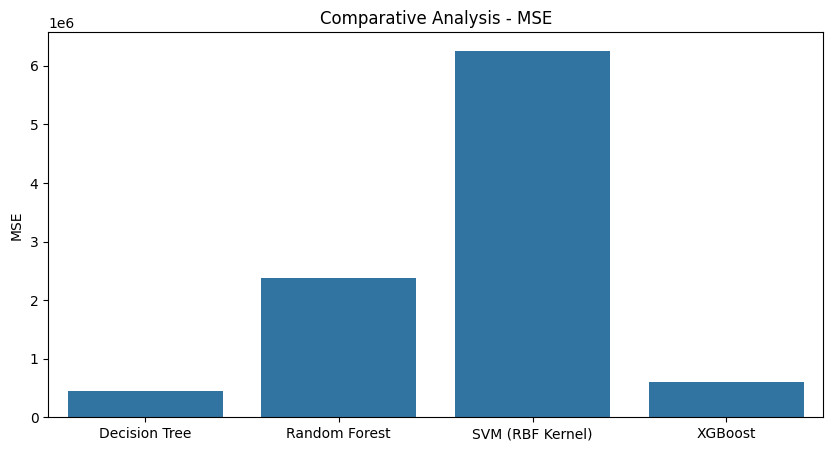

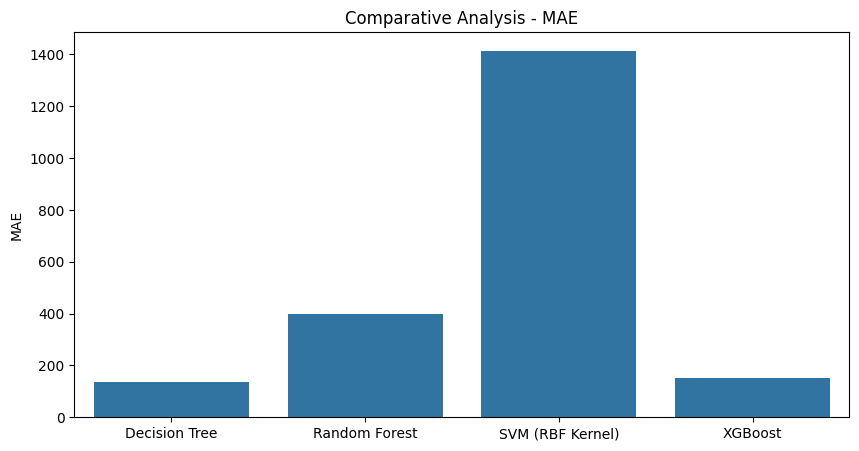

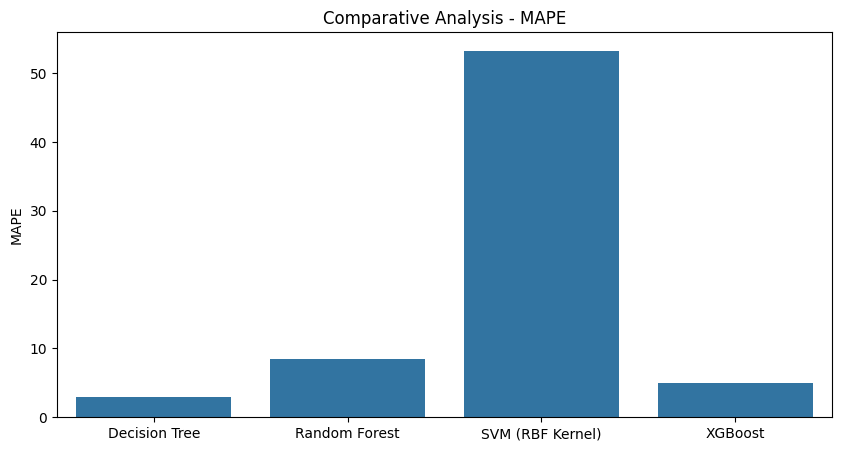

In [377]:
# Evaluation metrics for each model
evaluation_metrics = {
    'Decision Tree': {
        'R^2': 0.93658,
        'MSE': 455643.51852,
        'MAE': 134.53704,
        'MAPE': 2.9502066463451637,
    },
    'Random Forest': {
        'R^2': 0.88874,
        'MSE': 2374097.47114,
        'MAE': 397.75501,
        'MAPE': 8.440323856392366,
    },
    'SVM (RBF Kernel)': {
        'R^2': -0.09132,
        'MSE': 6259702.13552,
        'MAE': 1414.81848,
        'MAPE': 53.28393,
    },
    'XGBoost': {
        'R^2': 0.99177,
        'MSE': 605177.53734,
        'MAE': 151.20204,
        'MAPE': 5.00509,
    }
}

# Function to plot evaluation metrics
def plot_evaluation_metrics(metrics_dict):
    metrics = list(metrics_dict['Decision Tree'].keys())
    algorithms = metrics_dict.keys()

    # Plotting each metric
    for metric in metrics:
        plt.figure(figsize=(10, 5))
        values = [metrics_dict[algo][metric] for algo in algorithms]
        sns.barplot(x=list(algorithms), y=values)
        plt.title(f'Comparative Analysis - {metric}')
        plt.ylabel(metric)
        plt.show()

# Calling the function to plot the metrics
plot_evaluation_metrics(evaluation_metrics)
